In [1]:
#import
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

In [2]:
# Load from ex5data1.mat, where all variables will be store in a dictionary
path = 'C:\\Users\\39410\\Desktop\\大创项目\\吴恩达机器学习算法数据\\machine-learning-ex5\\ex5\\ex5data1.mat'
data = loadmat(path)

# Extract train, test, validation data from dictionary
# and also convert y's form 2-D matrix (MATLAB format) to a numpy vector
X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

#X.shape = (12,1)
#y.shape = (12,)
# m = Number of examples
m = y.size

# Plot training data
pyplot.plot(X, y, 'ro', ms=10, mec='k', mew=1)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)');

# the util code by teacher(train, normalize, plot)

In [3]:
def trainLinearReg(linearRegCostFunction, X, y, lambda_=0.0, maxiter=200):
    """
    Trains linear regression using scipy's optimize.minimize.
    Parameters
    ----------
    X : array_like
        The dataset with shape (m x n+1). The bias term is assumed to be concatenated.
    y : array_like
        Function values at each datapoint. A vector of shape (m,).
    lambda_ : float, optional
        The regularization parameter.
    maxiter : int, optional
        Maximum number of iteration for the optimization algorithm.
    Returns
    -------
    theta : array_like
        The parameters for linear regression. This is a vector of shape (n+1,).
    """
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': maxiter}

    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x

In [4]:
def featureNormalize(X):
    """
    Normalizes the features in X returns a normalized version of X where the mean value of each
    feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    
    Parameters
    ----------
    X : array_like
        An dataset which is a (m x n) matrix, where m is the number of examples,
        and n is the number of dimensions for each example.
        
    Returns
    -------
    X_norm : array_like
        The normalized input dataset.
    mu : array_like
        A vector of size n corresponding to the mean for each dimension across all examples.
    sigma : array_like
        A vector of size n corresponding to the standard deviations for each dimension across
        all examples.
    """
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

In [5]:
def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    """
    Plots a learned polynomial regression fit over an existing figure.
    Also works with linear regression.
    Plots the learned polynomial fit with power p and feature normalization (mu, sigma).
    Parameters
    ----------
    polyFeatures : func
        A function which generators polynomial features from a single feature.
    min_x : float
        The minimum value for the feature.
    max_x : float
        The maximum value for the feature.
    mu : float
        The mean feature value over the training dataset.
    sigma : float
        The feature standard deviation of the training dataset.
    theta : array_like
        The parameters for the trained polynomial linear regression.
    p : int
        The polynomial order.
    """
    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    # Plot
    pyplot.plot(x, np.dot(X_poly, theta), '--', lw=2)

# Cost function

In [6]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    # Initialize some useful values
    m = y.size # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    # compute J
    h = np.dot(X,theta)
    J = np.sum(((h - y)**2)) / (2 * m)
    J += (lambda_  * np.sum(theta[1:]**2) / (2 * m))
    
    #compute grad
    grad = np.dot((h - y),X) / m
    grad[1:] += (lambda_ / m) * theta[1:]
    
    return J,grad

In [7]:
# Test J
theta_tj = np.array([1, 1])
J, _ = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta_tj, 1)

print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192)



In [8]:
# Test grad
theta_tg = np.array([1, 1])
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta_tg, 1.0)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



# Plot fit line of training data

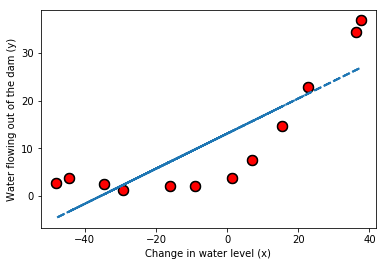

In [9]:
# plot fit line of training data
# add a columns of ones for the y-intercept
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = trainLinearReg(linearRegCostFunction, X_aug, y, lambda_=0)

#  Plot fit over the data
pyplot.plot(X, y, 'ro', ms=10, mec='k', mew=1.5)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.plot(X, np.dot(X_aug, theta), '--', lw=2);
pyplot.show()

# Plot the learning curve

In [10]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    # Number of training examples
    m = y.size
    
    # return values
    # take the J values for error
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    
    for i in range(1,m+1):
        theta = trainLinearReg(linearRegCostFunction, X[:i,:], y[:i],lambda_,maxiter= 500)
        error_train[i-1],_ = linearRegCostFunction(X[:i,:],y[:i],theta,lambda_)
        error_val[i-1],_ = linearRegCostFunction(Xval,yval,theta,lambda_)
    # 1.note that error_val should use all Xval and yval to tarin
    # it means use courrent theta(model) to compute error_val with all Xval
    # 2.note that the error does not include regularization term
    return error_train, error_val

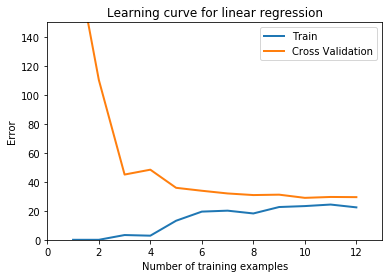

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368910
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


In [11]:
# plot the training error and cross validation error with size of examples
# it's high bias
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_= 0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 150])
pyplot.show()
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

# Polynomialize the features

In [12]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))
    
    for i in range(1,p+1):
        X_poly[:,i-1:i] = X ** i
        
    # X has only one column(attribute)，X_poly's column 1 holds the original values of X
    # column 2 holds the values of X^2, column 3 holds the values of X^3 and so on,
    # X_poly[i, :] = [X[i], X[i]**2, X[i]**3 ...  X[i]**p].
    
    # return a (m,p) matrix
    return X_poly

In [13]:
# implement the polyFeatures to 3 set -- training set,cross validation set and test set 
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)
# store mu and sigma of training set
# for siplifying X_poly_test and X_poly_val 


# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

# Plot polynomial learning curve with regularization

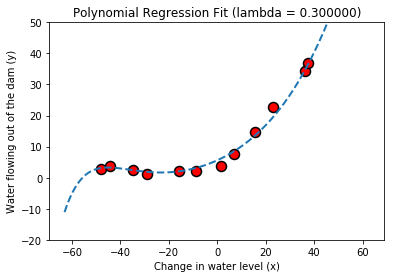

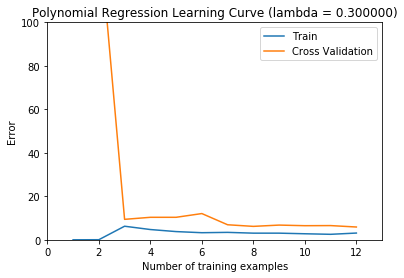

Polynomial Regression (lambda = 0.300000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846771
  	2		0.038996	143.370807
  	3		6.243911	9.406901
  	4		4.722625	10.344619
  	5		3.778100	10.348112
  	6		3.262643	12.066648
  	7		3.415910	6.916343
  	8		3.055477	6.174743
  	9		3.054105	6.765906
  	10		2.775629	6.486024
  	11		2.524261	6.536097
  	12		3.101591	5.882356


In [14]:
# plot learning curve
lambda_ = 0.3
theta = trainLinearReg(linearRegCostFunction,
                       X_poly,
                       y,
                       lambda_=lambda_,
                       maxiter=55)

# Plot training data and fit
pyplot.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
pyplot.ylim([-20, 50])


pyplot.figure()  #
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
pyplot.plot(np.arange(1, 1 + m), error_train, np.arange(1, 1 + m), error_val)

pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 100])
pyplot.legend(['Train', 'Cross Validation'])

pyplot.show()

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i + 1, error_train[i], error_val[i]))

# Plot Lambda-error curve to choose best lambda

In [15]:
def validationCurve(X, y, Xval, yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    
#     X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
#     Xval_aug = np.concatenate([np.ones((m,1)),Xval],axis = 1)
    
    for i in range(len(lambda_vec)):
        theta = trainLinearReg(linearRegCostFunction, X,y,lambda_=lambda_vec[i],maxiter=500)
        error_train[i],_ = linearRegCostFunction(X,y,theta,lambda_=lambda_vec[i])
        error_val[i],_ = linearRegCostFunction(Xval,yval,theta,lambda_=lambda_vec[i])
        
#     print(error_train)
#     print(error_val)
    return lambda_vec, error_train, error_val

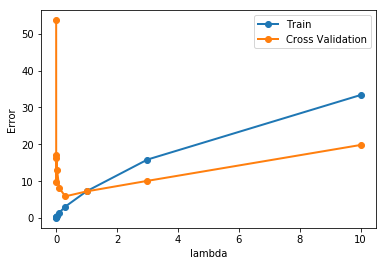

lambda		Train Error	Validation Error
 0.000000	0.028891	53.671742
 0.001000	0.174792	9.869175
 0.003000	0.249933	16.365540
 0.010000	0.385063	17.039567
 0.030000	0.669275	13.050449
 0.100000	1.443470	8.149057
 0.300000	3.101591	5.882356
 1.000000	7.268148	7.227427
 3.000000	15.867688	10.089368
 10.000000	33.372203	19.819800


In [16]:
# plot lambda_ and error curve to choose best lambda_
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')
pyplot.show()

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

In [17]:
# compute test error using the best lambda_
theta = trainLinearReg(linearRegCostFunction,X_poly,y,lambda_=1)
error_test,_ = linearRegCostFunction(X_poly_test,ytest,theta,lambda_=1)
print(error_test)

5.69280874008


# Plot learning curve with average error

In [18]:
def learningCurveAverageError(X, y, Xval, yval, lambda_=0):
    m = y.size
    n = X.shape[1]
    repeat = 1000
    # m is the number of training set examples
    # n is the number of attributes
    
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    
    for k in range(repeat):
        for i in range(1,m+1):# without jumping range
            random_X = np.random.randint(i,size=i)
            X_extract = np.zeros((i,n))
            y_extract = np.zeros(i)
            for j in range(i):
                X_extract[j] = X[random_X[j]]
                y_extract[j] = y[random_X[j]]

            theta = trainLinearReg(linearRegCostFunction,X_extract,y_extract,lambda_,maxiter=500)
            temp_error1,_ = linearRegCostFunction(X_extract,y_extract,theta,lambda_)
            temp_error2,_ = linearRegCostFunction(Xval,yval,theta,lambda_)
            error_train[i-1] += temp_error1
            error_val[i-1] += temp_error2
            
    error_train /= repeat
    error_val /= repeat
    # compute the mean of 50 times
    
    return error_train,error_val

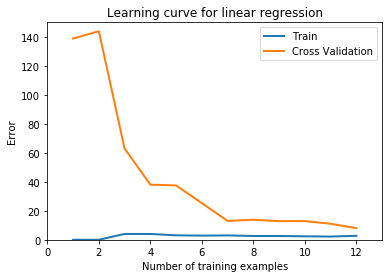

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846771
  	2		0.020395	143.894854
  	3		4.037262	63.000218
  	4		4.022275	38.022646
  	5		3.094826	37.512874
  	6		2.886316	25.295514
  	7		3.024068	13.035595
  	8		2.632722	13.838121
  	9		2.635555	12.870729
  	10		2.407345	12.926916
  	11		2.233713	11.065157
  	12		2.756908	8.063171


In [19]:
# plot the training error and cross validation error with using learningCurveAverageError
# and polynomial regression and lambda_ = 0.3(the best)

error_train, error_val = learningCurveAverageError(X_poly, y, X_poly_val, yval, lambda_= 0.3)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 150])
pyplot.show()
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))